In [51]:
from utils import *
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn import metrics
import statsmodels


### Prosody Feats

In [81]:
#Merge prosody features and features related to intensity
prosody = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GITA/Acoustic/Prosody/prosody.csv')
intensity = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GITA/Acoustic/Harmonics.csv')
prosody['intensity'] =intensity['stddev_intensity'].tolist()
prosody = prosody.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 'F0skew',
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
#'1F0std',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

In [83]:
first_column = prosody.pop('intensity')
prosody.insert(0, 'intensity_std', first_column)
prosody = prosody.drop(columns="Unnamed: 0")
prosody['label']=prosody['id'].str.split('_').str[0]
prosody['tasks'] = [elem.split("_")[2].split(".wav")[0] for elem in prosody['id'].tolist()]
prosody = prosody.drop(columns=[ 'id'])

In [88]:
# Group by task
tasks = prosody.groupby("tasks")
monologue = tasks.get_group("monologue")
laura = tasks.get_group("laura")
rosita = tasks.get_group("rosita")
rosita = tasks.get_group("micasa")
loslibros = tasks.get_group("loslibros")
luisa = tasks.get_group("luisa")
readtext = tasks.get_group("readtext")
TDU = pd.concat([laura, rosita, rosita,loslibros,luisa  ])

## Read Passage (RP)

In [90]:
grouped = readtext.groupby("label")  #here we extract the values by category
control = grouped.get_group("HC") 
parkinson_ = grouped.get_group("PD")
task = readtext.columns[:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(readtext.columns[:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(readtext.columns[:-2])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/rp_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/rp_new.txt')
holm_correction(kruskal_1)

(['kruskal results for F0std controls vs. parkinson 0.0036236425715923315 '],
 [0.010870927714776995])

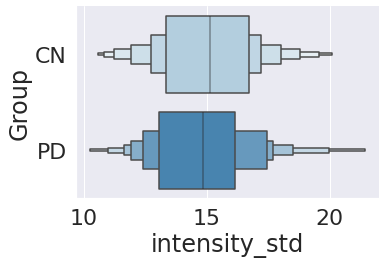

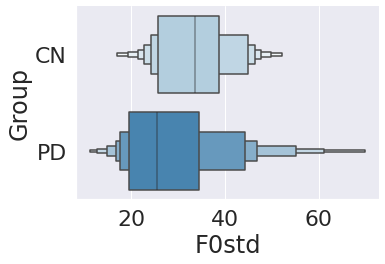

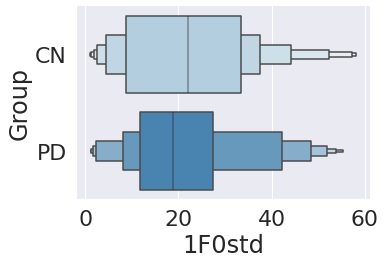

In [91]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Text Dependent Utterances (TDU)

In [92]:
grouped = TDU.groupby("label")  #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = TDU.columns[:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(TDU.columns[:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(TDU.columns[:-2])])


with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/TDU_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/TDU_new.txt')
holm_correction(kruskal_1)

(['kruskal results for intensity_std controls vs. parkinson 0.0049174854196175856 ',
  'kruskal results for F0std controls vs. parkinson 0.006296793861927949 ',
  'kruskal results for 1F0std controls vs. parkinson 0.022828994653948893 '],
 [0.009445190792891925, 0.009445190792891925, 0.022828994653948893])

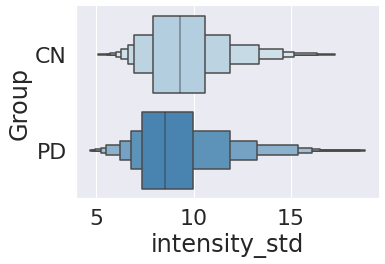

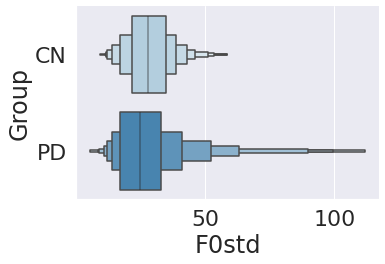

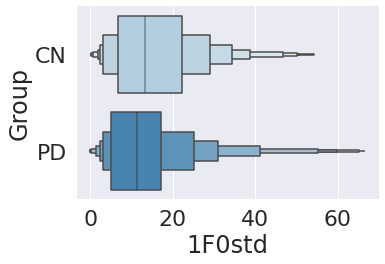

In [68]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    

## Monologue

In [93]:

grouped = monologue.groupby("label")  #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = monologue.columns[:-3].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monologue.columns[:-3])])
control_all_feat = np.array([control[feat] for feat in np.array(monologue.columns[:-3])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/monologue.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Results/monologue.txt')
holm_correction(kruskal_1)

([], [])